In [23]:
library(tidyverse)
library(nycflights13)
library(lubridate)

# library(seriation)
# library(GGally)
# library(arm)
# library(d3heatmap)
# library(heatmaply)


# to use original type
# stats::filter()
#  stats::lag()

# nycflights13::flights
# ?nycflights13::flights

# filter()
# arrange()
# select()
# mutate()
# summarize()
# group_by()

color,cut,n
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337
E,Ideal,3903


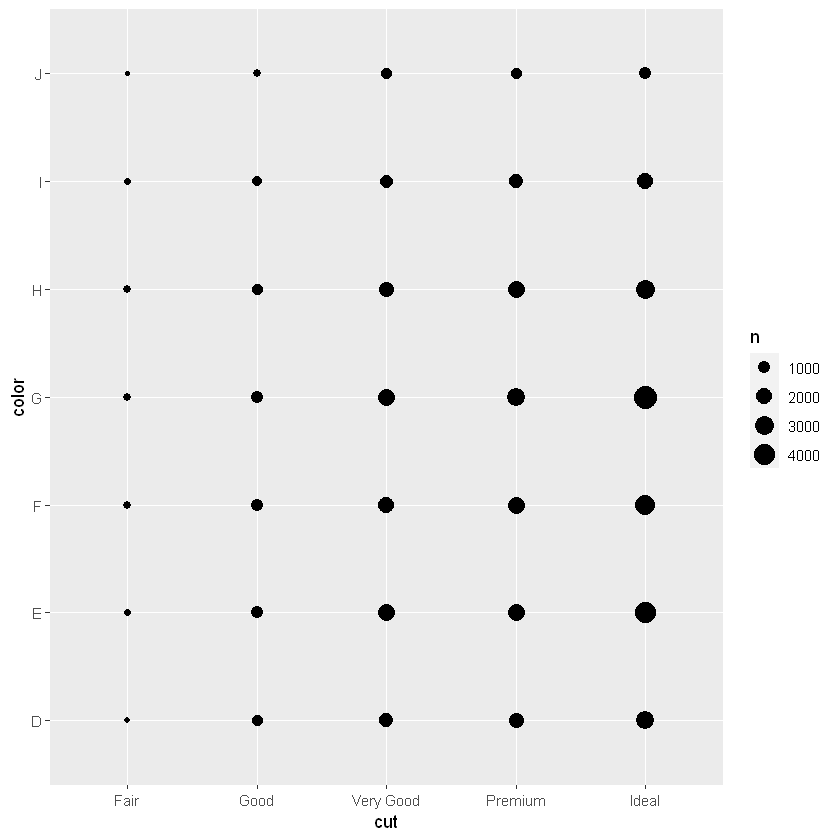

In [3]:
ggplot(data = diamonds) +
geom_count(mapping = aes(x = cut, y = color))

diamonds %>%
count(color, cut)

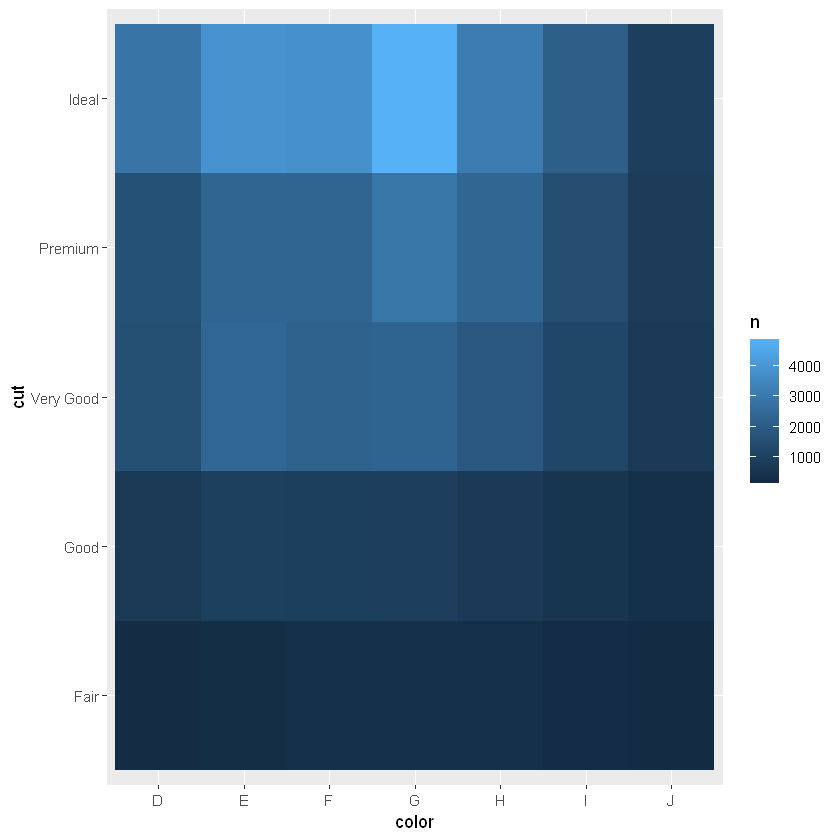

In [4]:
diamonds %>%
count(color, cut) %>%
ggplot(mapping = aes(x = color, y = cut)) +
geom_tile(mapping = aes(fill = n))

color,cut,gr_sum
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337
E,Ideal,3903


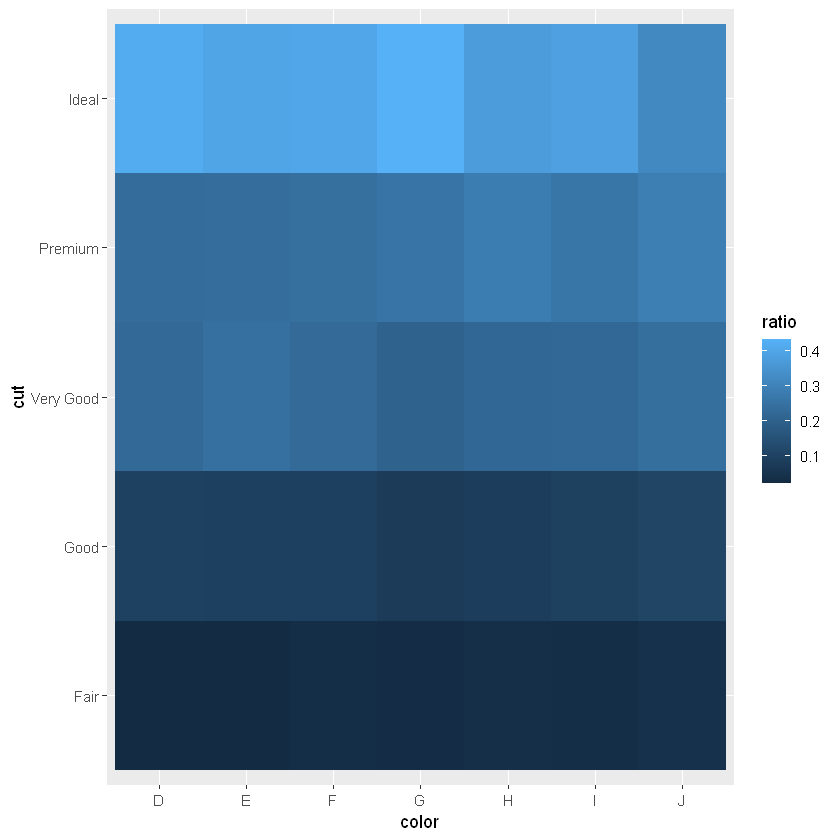

In [24]:
# Exercise Page 101
# Problem 1

diamonds %>% group_by(color, cut) %>% summarize(gr_sum = n()) 

# diamonds %>% group_by(color) %>% mutate(gr1_sum = n()) %>% group_by(color, cut) %>% mutate(gr2_sum = n()) %>% 
#    select(color, cut, gr1_sum, gr2_sum)  %>% arrange(color)

diamonds %>%
  count(color, cut) %>%
  group_by(color) %>%
  mutate(ratio = n / sum(n)) %>%
  ggplot(aes(color, cut, fill = ratio)) +
  geom_tile()

ERROR: Error in library(viridis): there is no package called 'viridis'


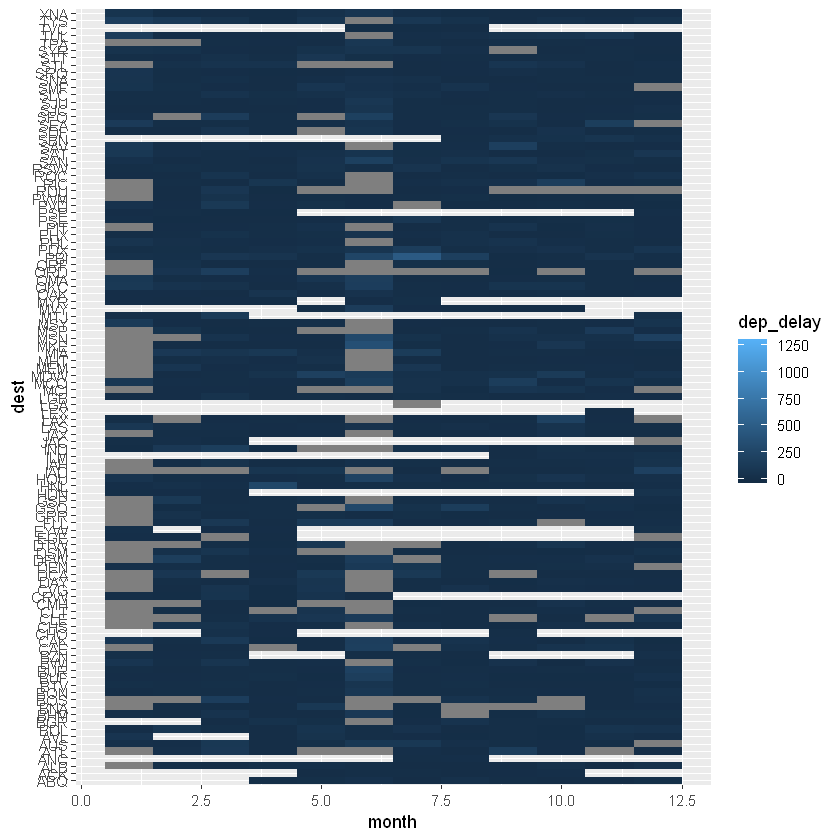

In [26]:
# Exercise Page 101
# Problem 2


flights %>%
  ggplot(aes(x = month, y = dest, fill = dep_delay)) +
  geom_tile()

library(viridis)
library(forcats)

flights %>%
  mutate(tot_delay = dep_delay + arr_delay) %>%
  filter(tot_delay > 0) %>%
  group_by(dest, month) %>%
  summarize(dep_del_dev = mean(tot_delay, na.rm = T)) %>%
  filter(n() == 12) %>%
  ungroup() %>%
  ggplot(aes(x = factor(month), y = fct_reorder(dest, dep_del_dev), fill = dep_del_dev)) +
  geom_tile() +
  scale_fill_viridis()

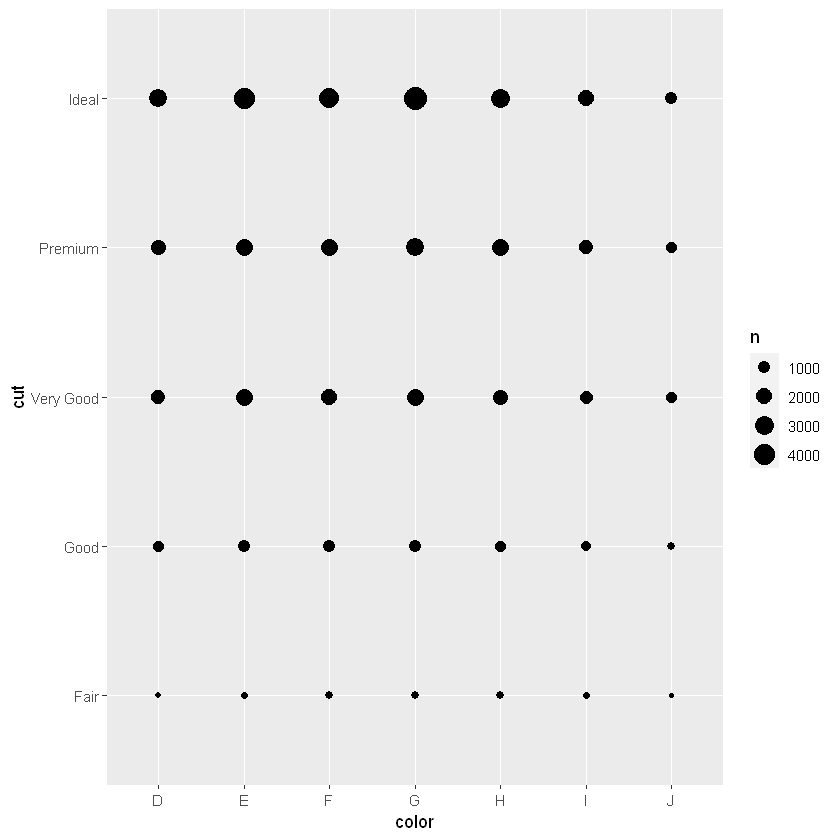

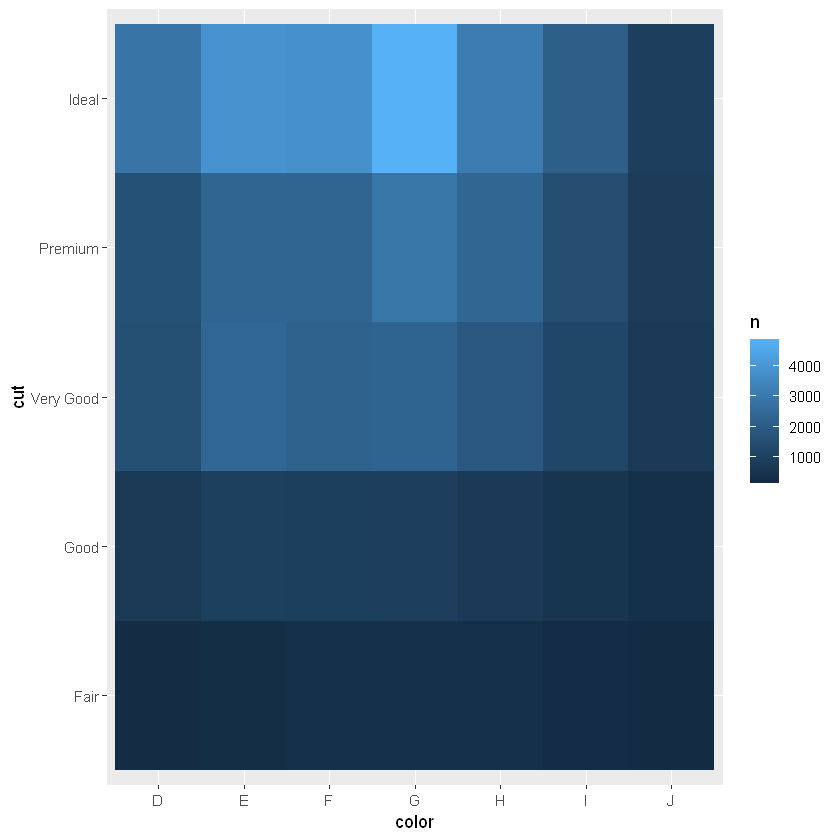

In [29]:
# Exercise Page 101
# Problem 3

ggplot(data = diamonds) +
geom_count(mapping = aes(x = color, y = cut))

diamonds %>%
  count(color, cut) %>%
  ggplot(aes(x = color, y = cut)) +
  geom_tile(aes(fill = n))

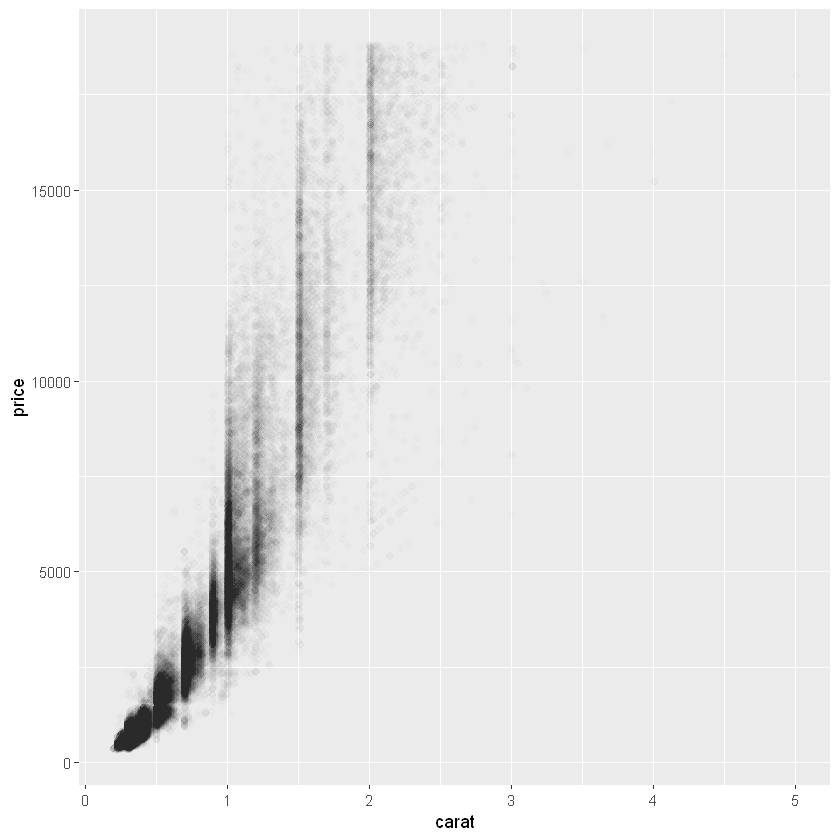

In [31]:
# Examples

ggplot(data = diamonds) +
geom_point(
mapping = aes(x = carat, y = price),
alpha = 1 / 100 # transparecy
)

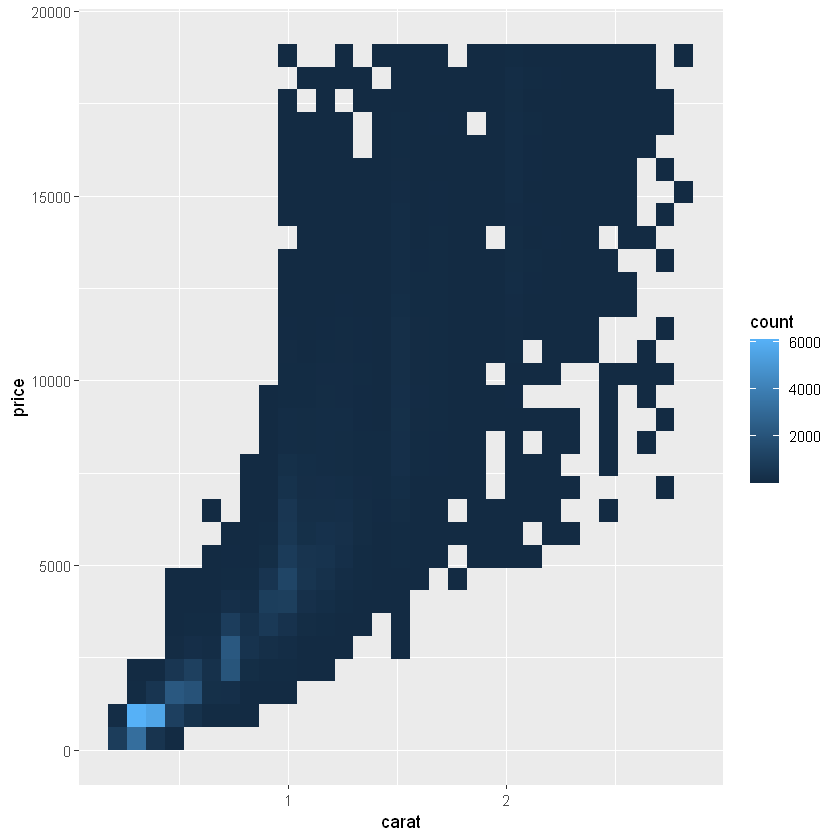

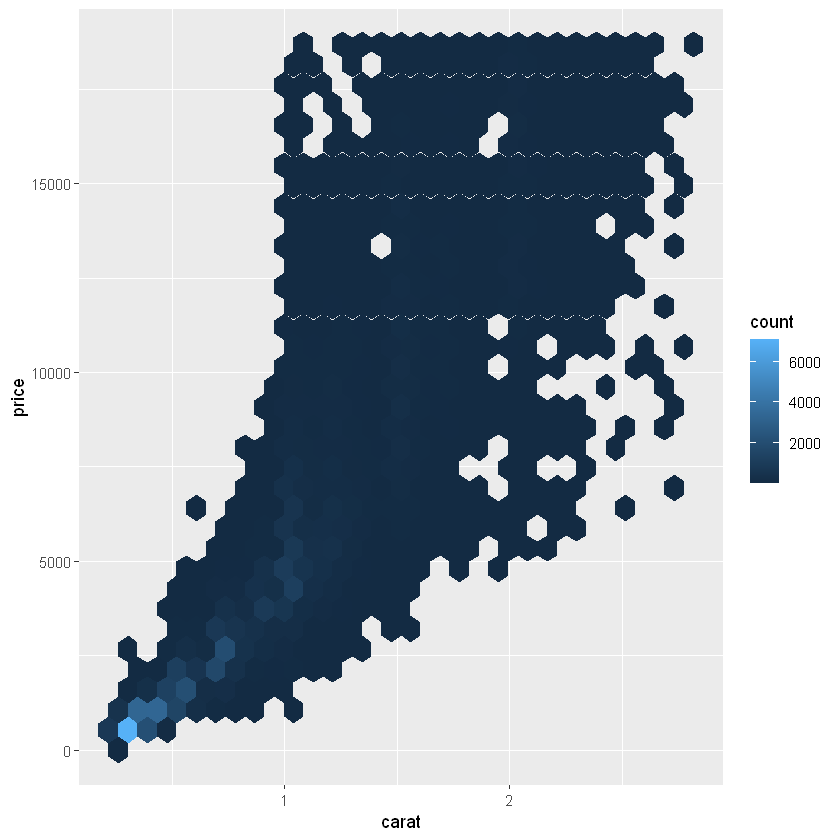

In [37]:
library(hexbin)

smaller <- diamonds %>%
filter(carat < 3)

ggplot(data = smaller) +
geom_bin2d(mapping = aes(x = carat, y = price))

ggplot(data = smaller) +
geom_hex(mapping = aes(x = carat, y = price))

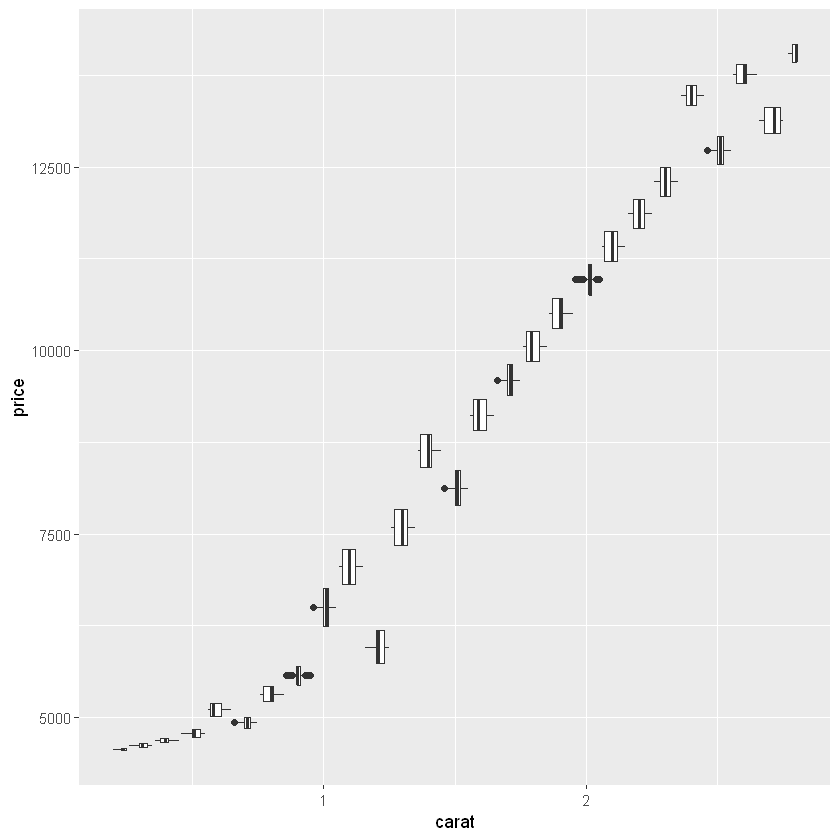

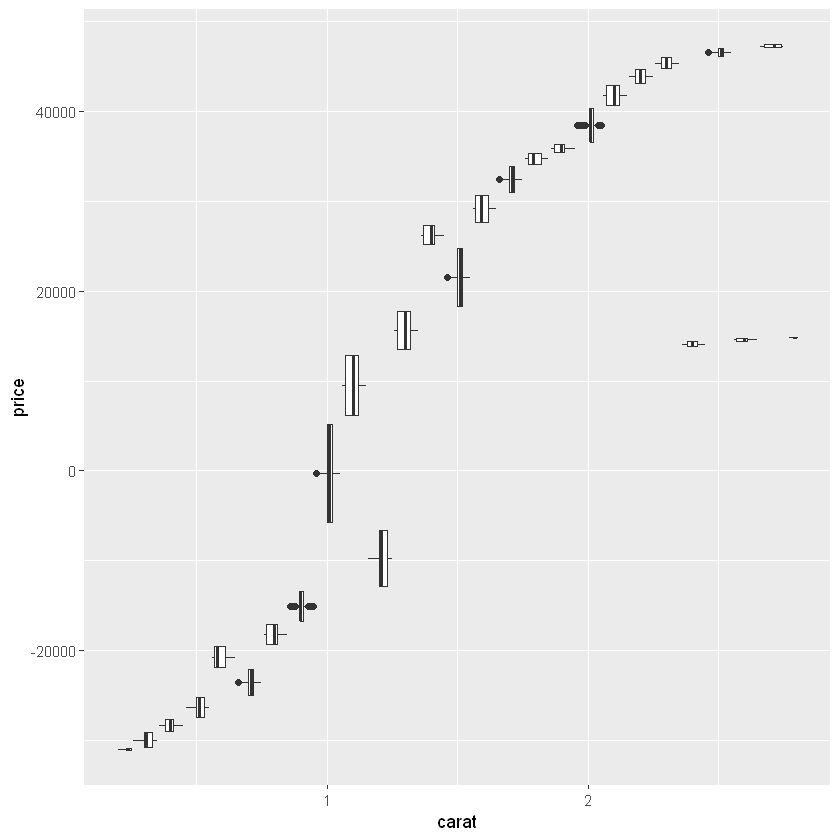

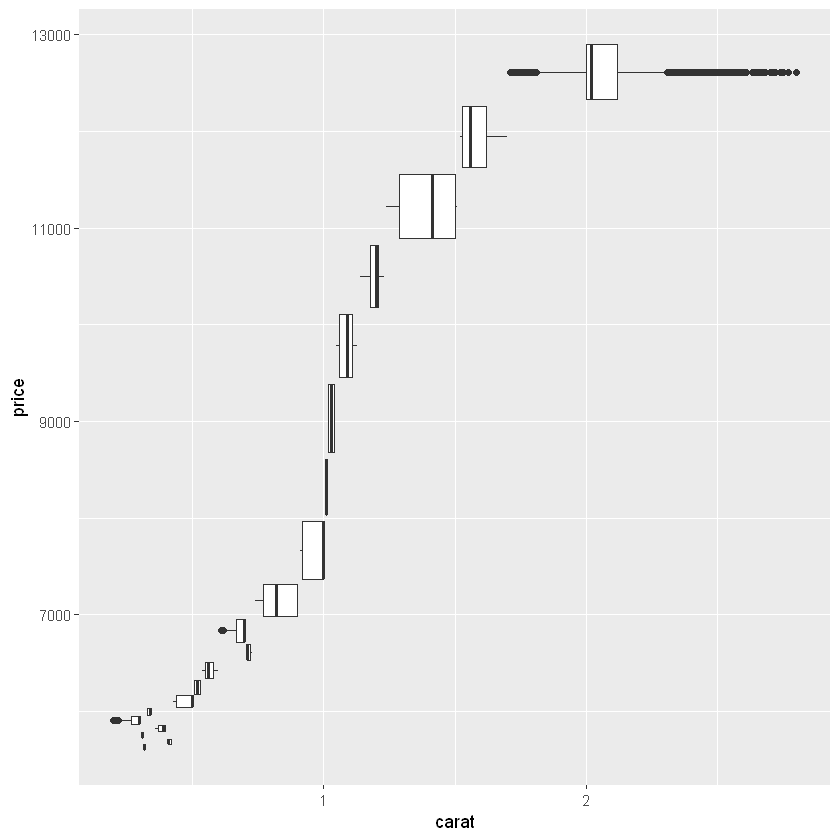

In [43]:
ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
    geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)))

ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
    geom_boxplot(mapping = aes(group = cut_width(carat, 0.1)),varwidth = T)

ggplot(data = smaller, mapping = aes(x = carat, y = price)) +
    geom_boxplot(mapping = aes(group = cut_number(carat, 20)))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


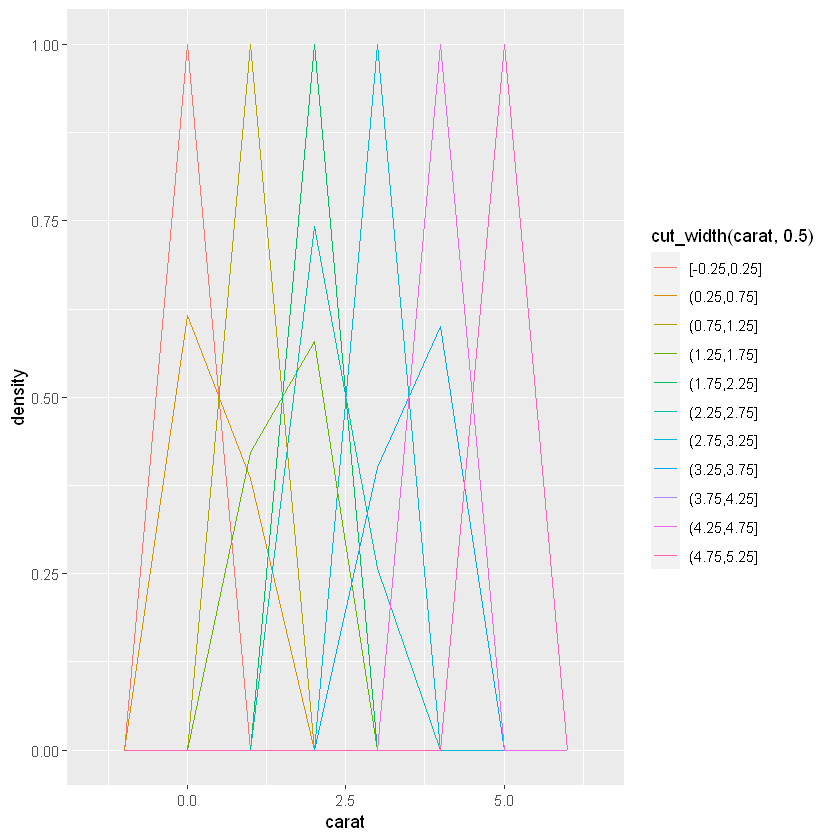

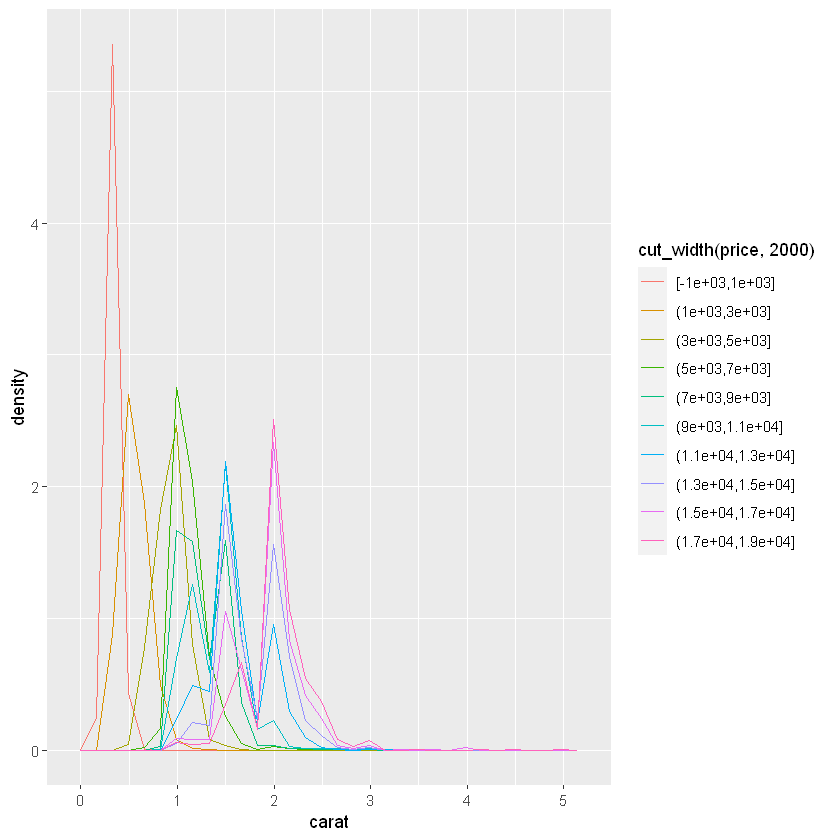

In [61]:
# Exercise Page 103
# Problem 1

diamonds %>% ggplot(aes(x = carat, color = cut_width(carat,0.5), ..density..)) +
    geom_freqpoly(binwidth = 1)




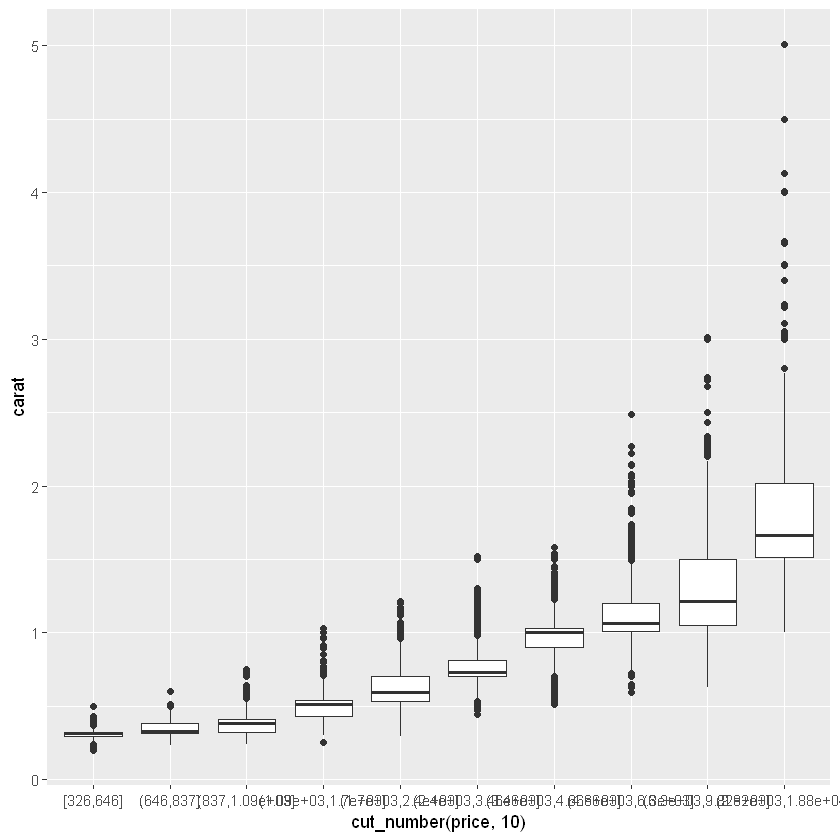

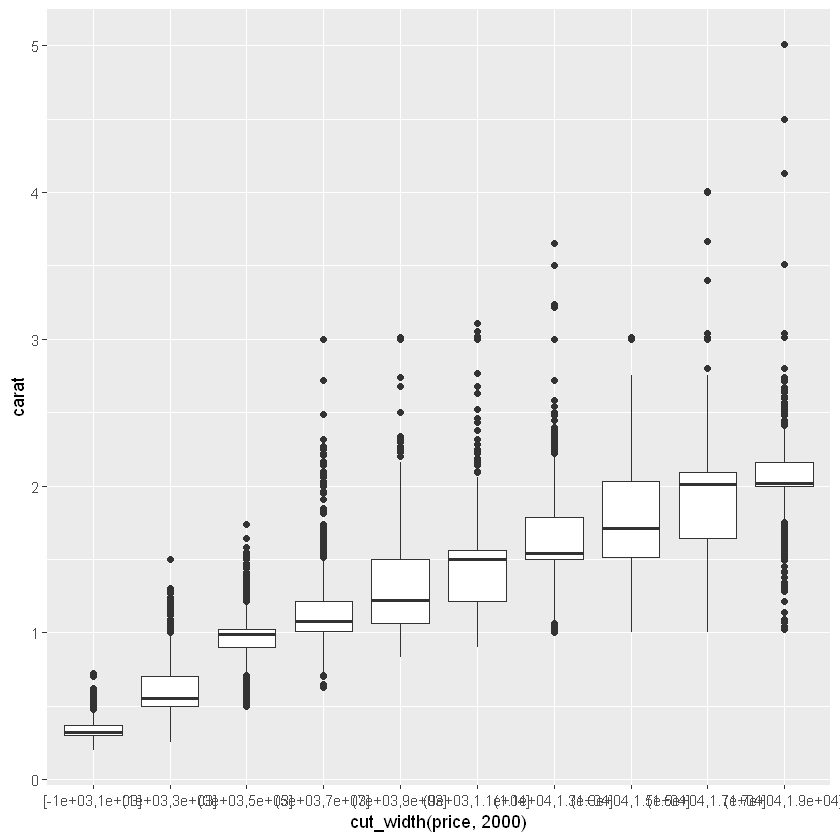

In [62]:
ggplot(data = diamonds, aes(x=cut_number(price, 10), y=carat)) +
  geom_boxplot() #+ coord_flip()

ggplot(data = diamonds, aes(x=cut_width(price, 2000), y=carat)) +
  geom_boxplot() #+ coord_flip()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


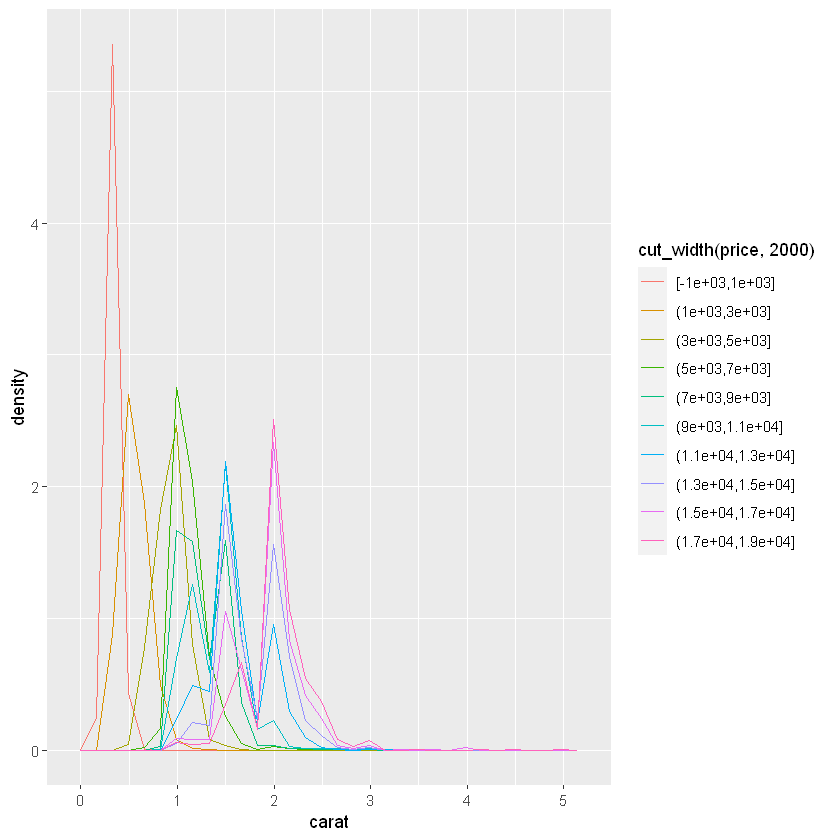

In [63]:
# Exercise Page 103
# Problem 2

ggplot(diamonds, aes(carat, y = ..density.., colour = cut_width(price, 2000))) +
  geom_freqpoly()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


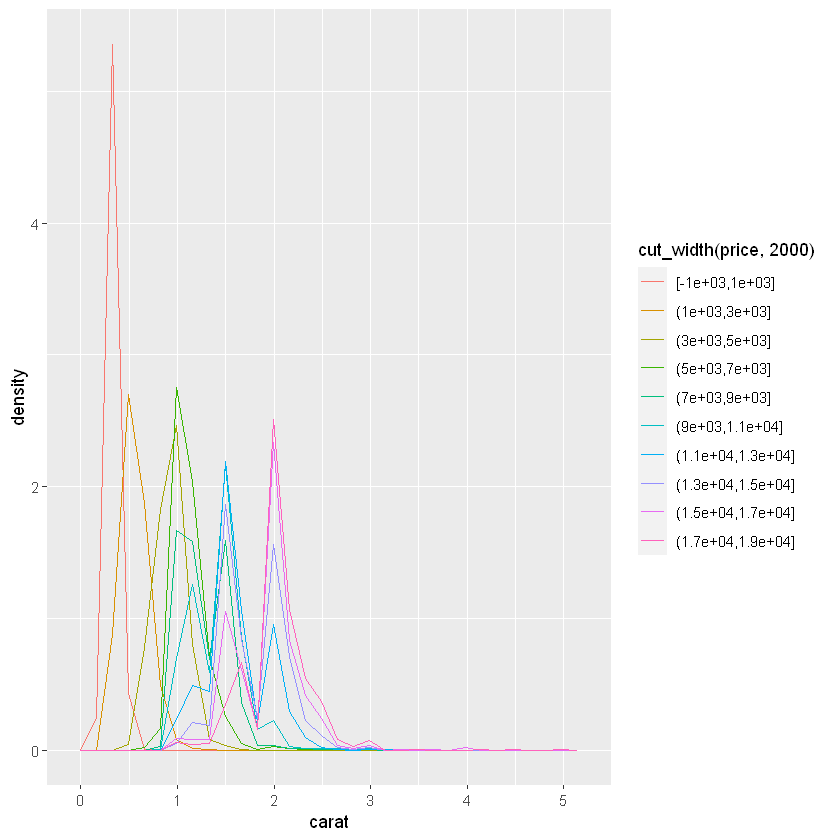

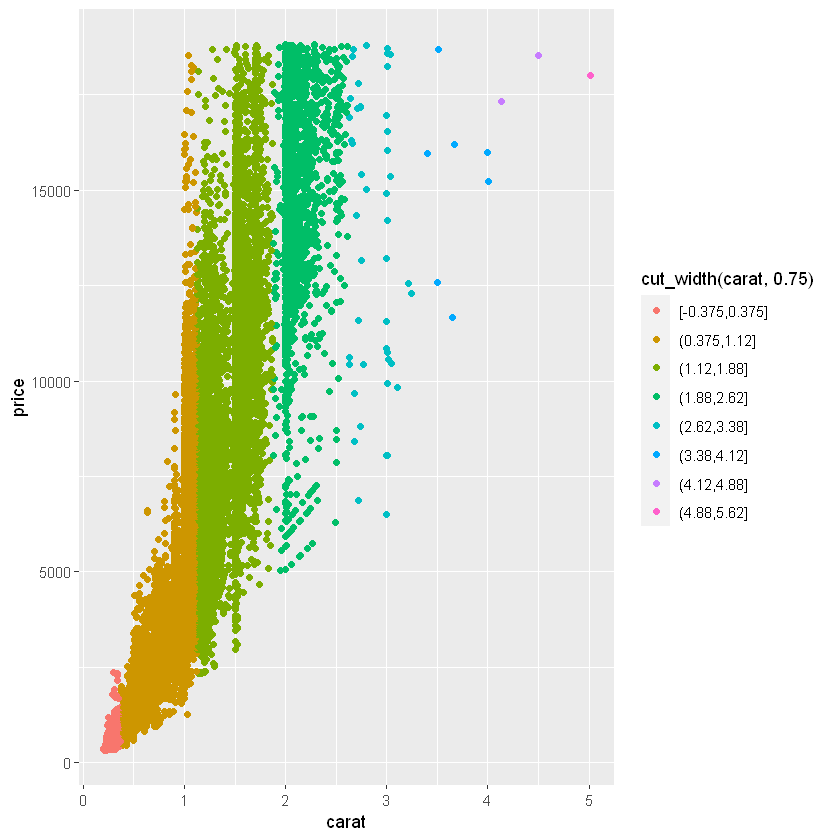

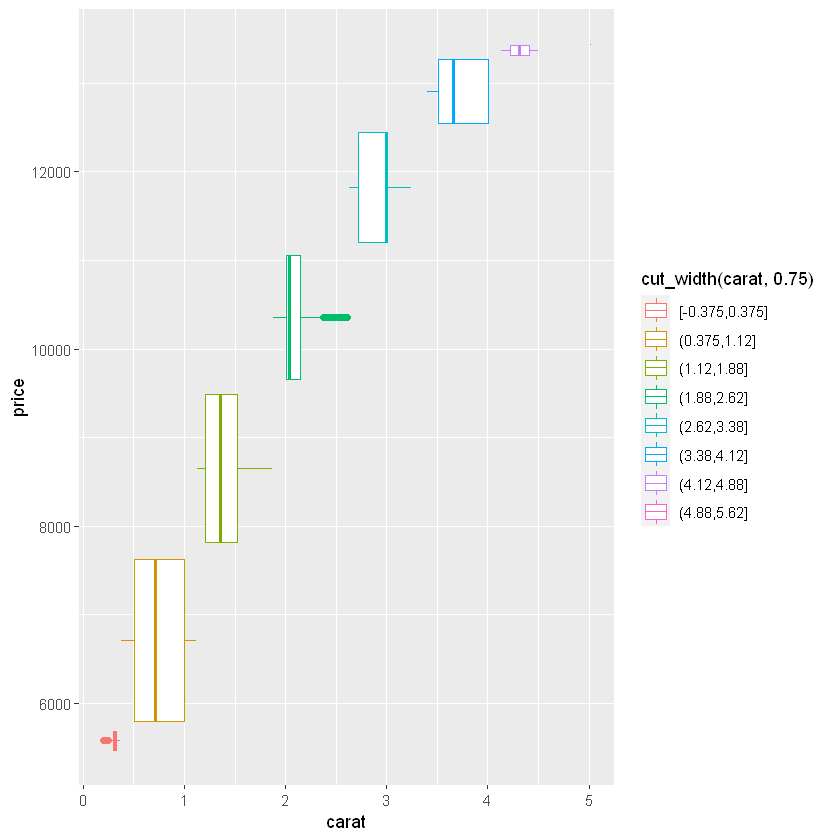

In [72]:
# Exercise Page 103
# Problem 3

ggplot(diamonds, aes(carat, y = ..density.., colour = cut_width(price, 2000))) +
  geom_freqpoly()


# ggplot(data = diamonds, mapping = aes(x = price, y = carat)) + geom_point() + coord_flip()

ggplot(data = diamonds, mapping = aes(x = price, y = carat)) + geom_point(aes(color = cut_width(carat,0.75))) + coord_flip()

ggplot(data = diamonds, mapping = aes(x = price, y = carat)) + geom_boxplot(aes(color = cut_width(carat,0.75))) + coord_flip()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


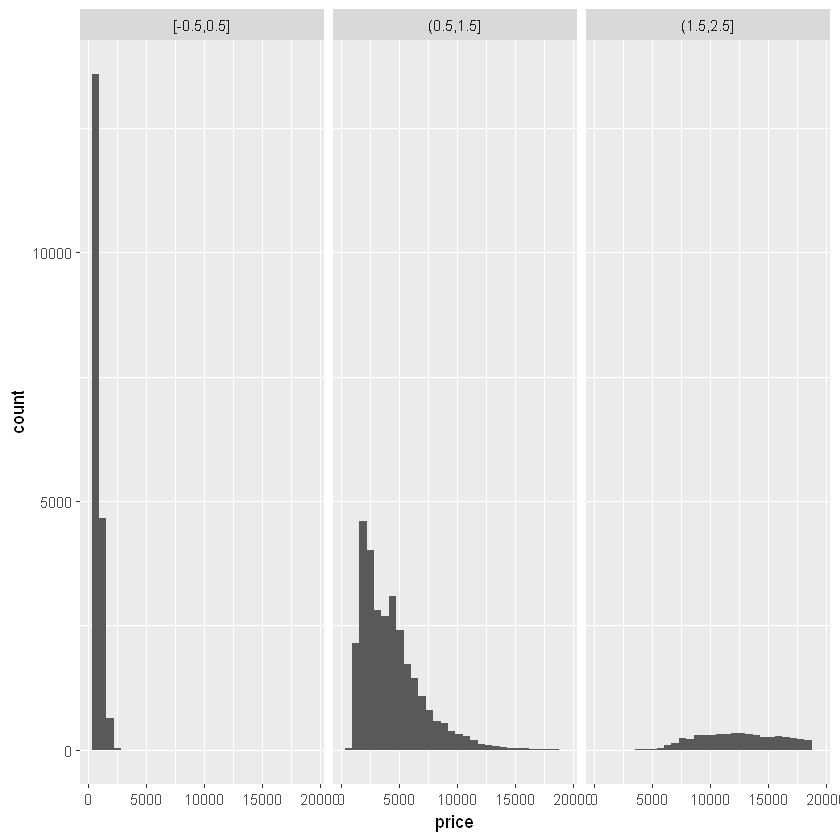

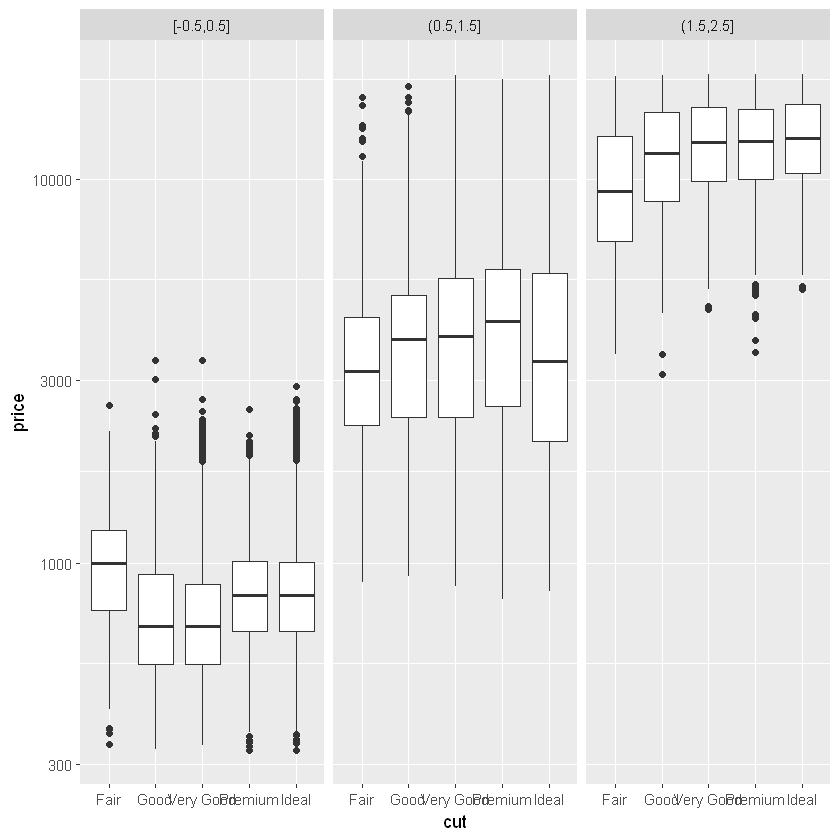

In [75]:
# Exercise Page 103
# Problem 3

diamonds %>%
  filter(between(carat, 0, 2.5)) %>%
  mutate(carat = cut_width(carat, 1)) %>%
  ggplot(aes(price)) +
           geom_histogram() +
           facet_wrap(~ carat)



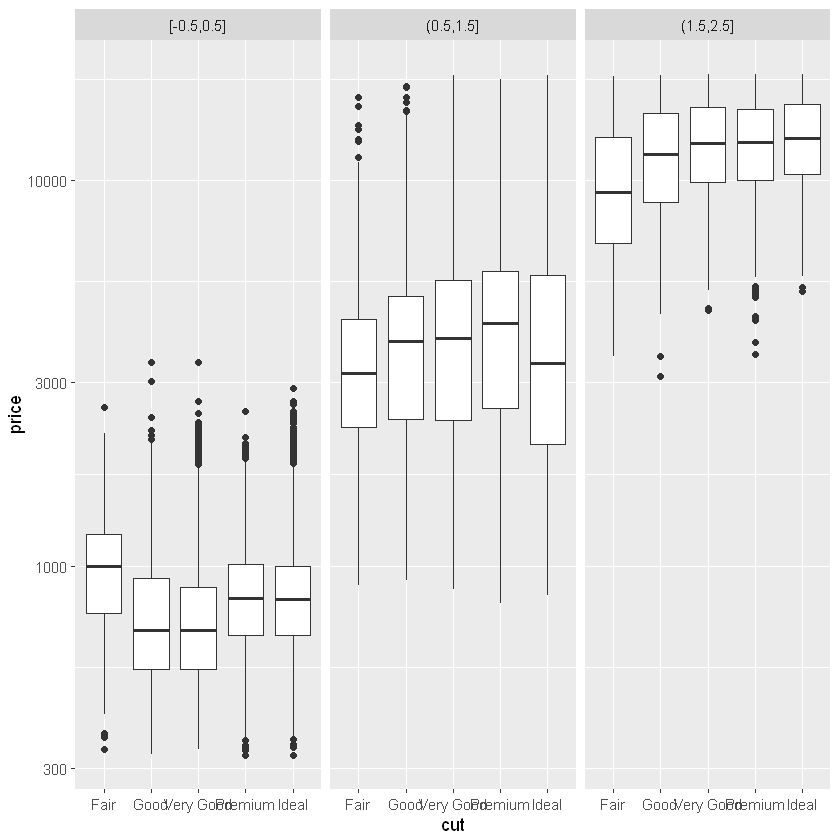

In [76]:
# Exercise Page 103
# Problem 4

diamonds %>%
  filter(between(carat, 0, 2.5)) %>%
  mutate(carat = cut_width(carat, 1)) %>%
  ggplot(aes(cut, price)) +
  geom_boxplot() +
  scale_y_log10() +
  facet_wrap(~ carat)

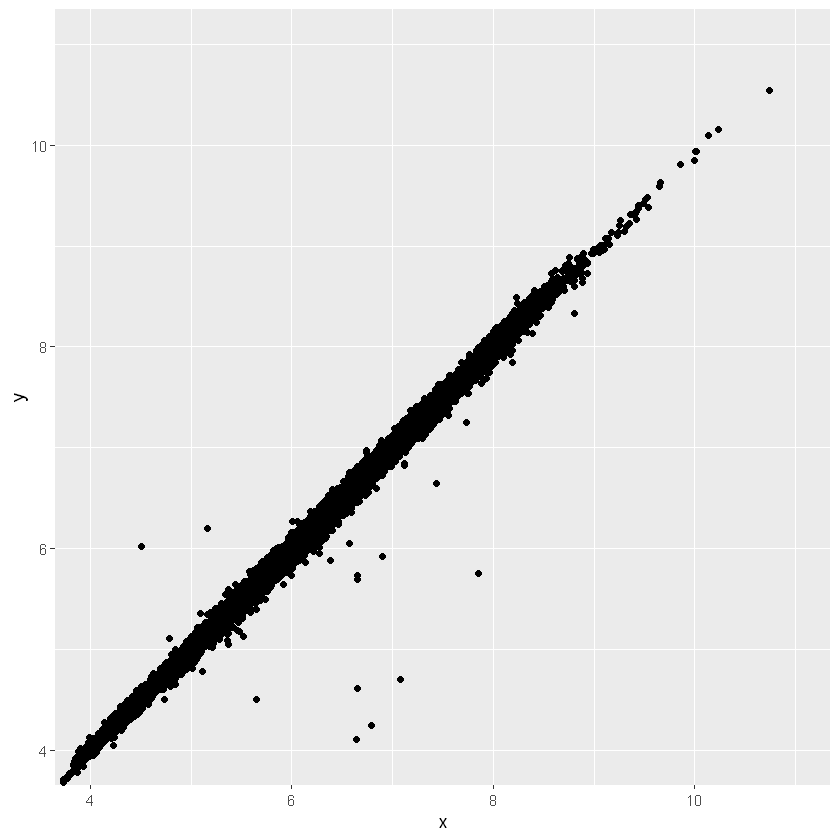

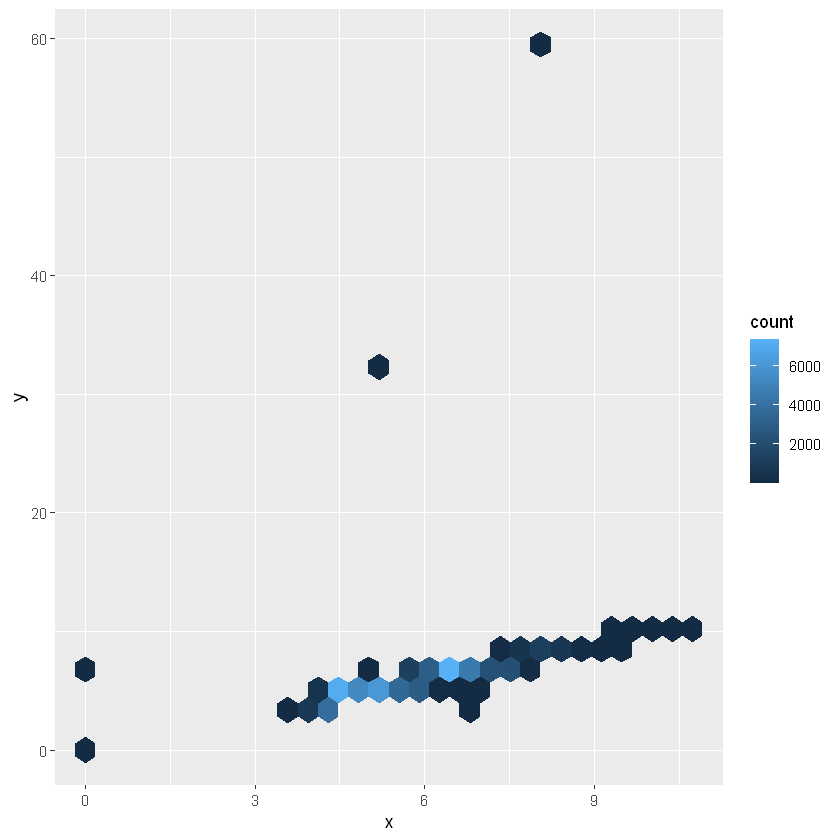

In [78]:
# Exercise Page 103
# Problem 5

ggplot(diamonds, aes(x, y)) +
  geom_point() +
  coord_cartesian(xlim = c(4, 11), ylim = c(4, 11))

ggplot(diamonds, aes(x, y)) +
  geom_hex()

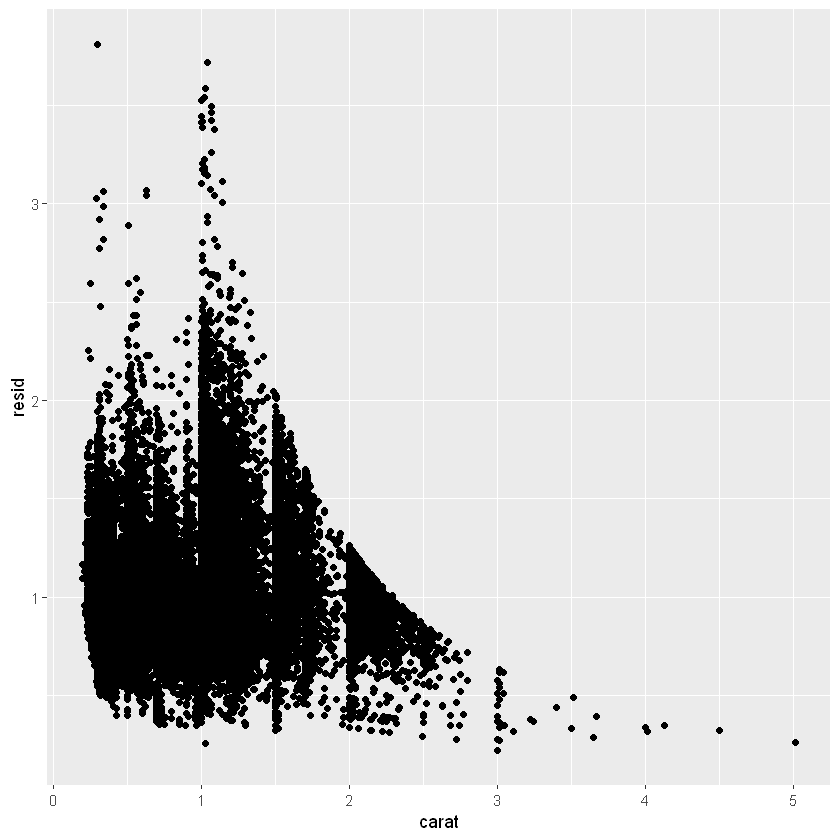

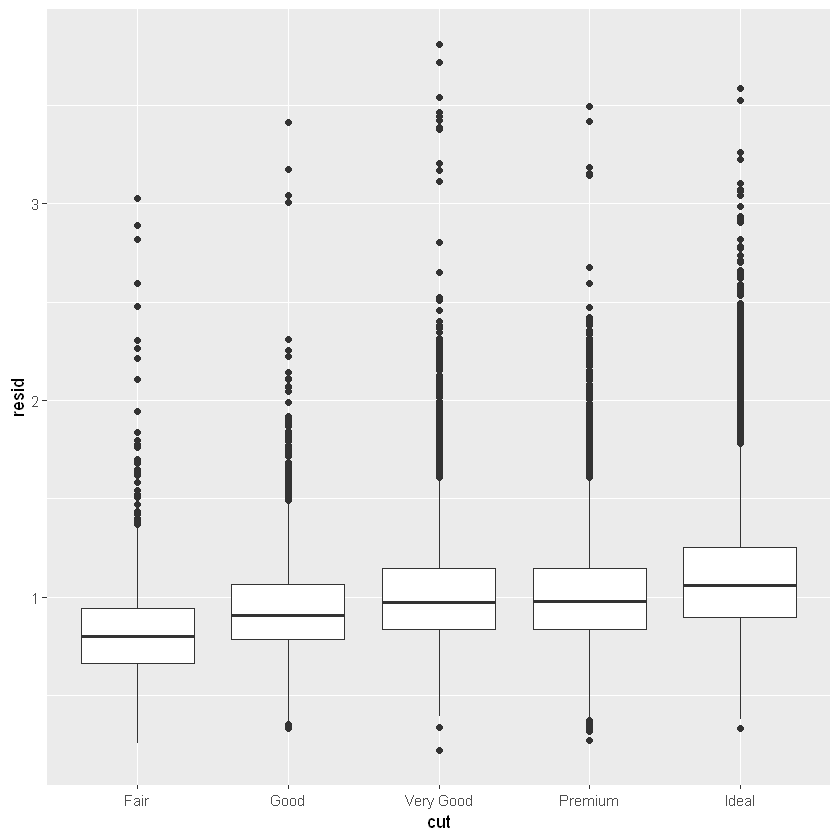

In [66]:
# Page 106
# case study

library(modelr)

mod <- lm(log(price) ~ log(carat), data = diamonds)

diamonds2 <- diamonds %>%
    add_residuals(mod) %>%
    mutate(resid = exp(resid))

ggplot(data = diamonds2) +
    geom_point(mapping = aes(x = carat, y = resid))

ggplot(data = diamonds2) +
    geom_boxplot(mapping = aes(x = cut, y = resid))